In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
np.set_printoptions(linewidth=200)

def plot_array(array0):
    plt.figure(figsize=(16,16)) 
    plt.imshow(array0, cmap='Greens', vmax=50, vmin=0) # , origin='lower')
    for (i,j),label in np.ndenumerate(array0):
        if array0[i,j] != 0:
            # j,i --> x, y, OR i,j is Row (y), Column (x) of matrix
            plt.text(j,i,label,ha='center',va='center')
    ticks=np.arange(0, array0.shape[0])
    plt.xticks(ticks-0.5, ticks)
    plt.yticks(ticks-0.5, ticks)
    plt.grid()
    plt.show()
    
def NeighborSum(array0, i, j):
    arr = array0[i,j]
    if arr == 0:
        arr = array0[i-1:i+2, j-1:j+2].sum()         
    return arr

def apply_candidate(arr, candidate):
    arr_new = np.copy(arr)
    # create a final array
    for action in candidate:
        i = action[0]
        j = action[1]
        v = action[2]
        arr_new[i,j] = v
    return arr_new
    

def addAction(arr, candidate_list, n):
    # input
    # arr: the initial array which has a fixed size
    # candidate_list: the solution list for n-1
    # n: the next number to target
    # output
    # candidate_list_new: the solution list for n
    #
    nsize = arr.shape[0]
    candidates_list_new = []
    
    for candidate in candidate_list:
        arr_new = np.copy(arr)
        # create a final array
        for action in candidate:
            i = action[0]
            j = action[1]
            v = action[2]
            arr_new[i,j] = v
            #actions_new.append(kaction)
            
        # find out the solution for n
        candidate_new = candidate.copy() # copy of actions
        for i in range(0, nsize):
            for j in range(0, nsize):
                dat = NeighborSum(arr_new, i, j)
                if dat == n:
                    candidate_new.append((i, j, n))
                    candidates_list_new.append(candidate_new)
                    candidate_new = candidate.copy()
                    # print(candidate_new)
                    #print(candidates_list_new)
                    #print(i,j,n)
                # continue
        
    return candidates_list_new





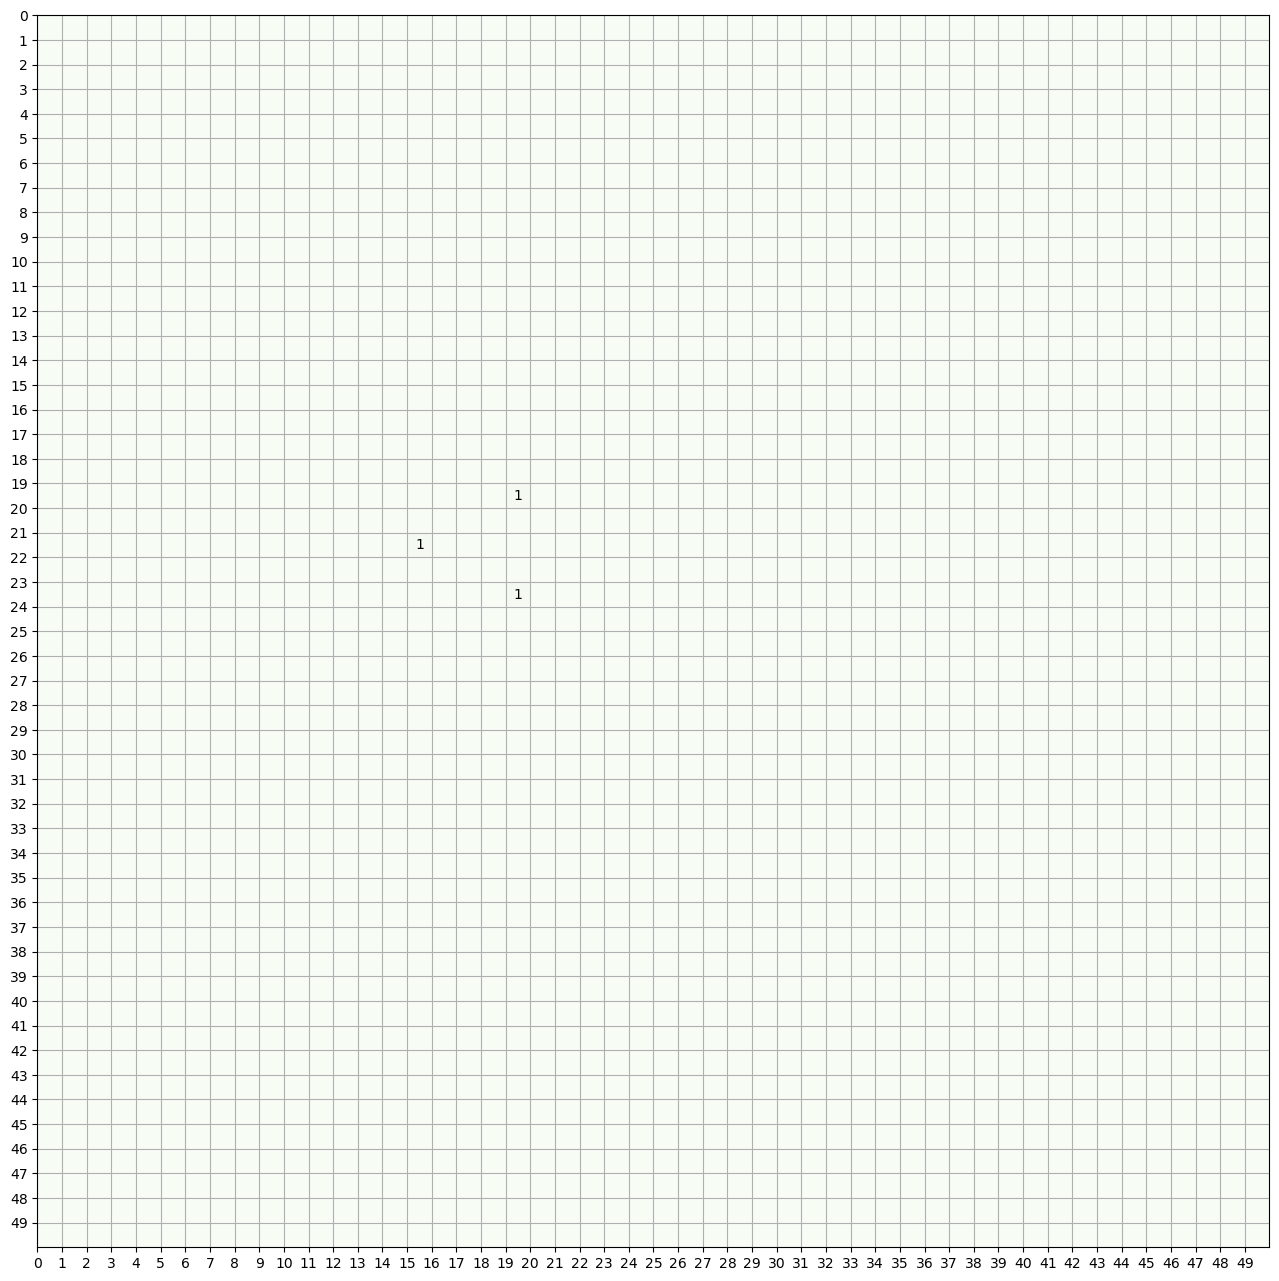

In [2]:
# initilize the array
test0 = np.zeros((50,50), dtype=int)
test0[19,19] = 1
test0[21,15] = 1
test0[23,19] = 1
# test0[25,17] = 1
# test0[27,21]= 1
# test0[29,16] = 1

plot_array(test0)



Current number:  2


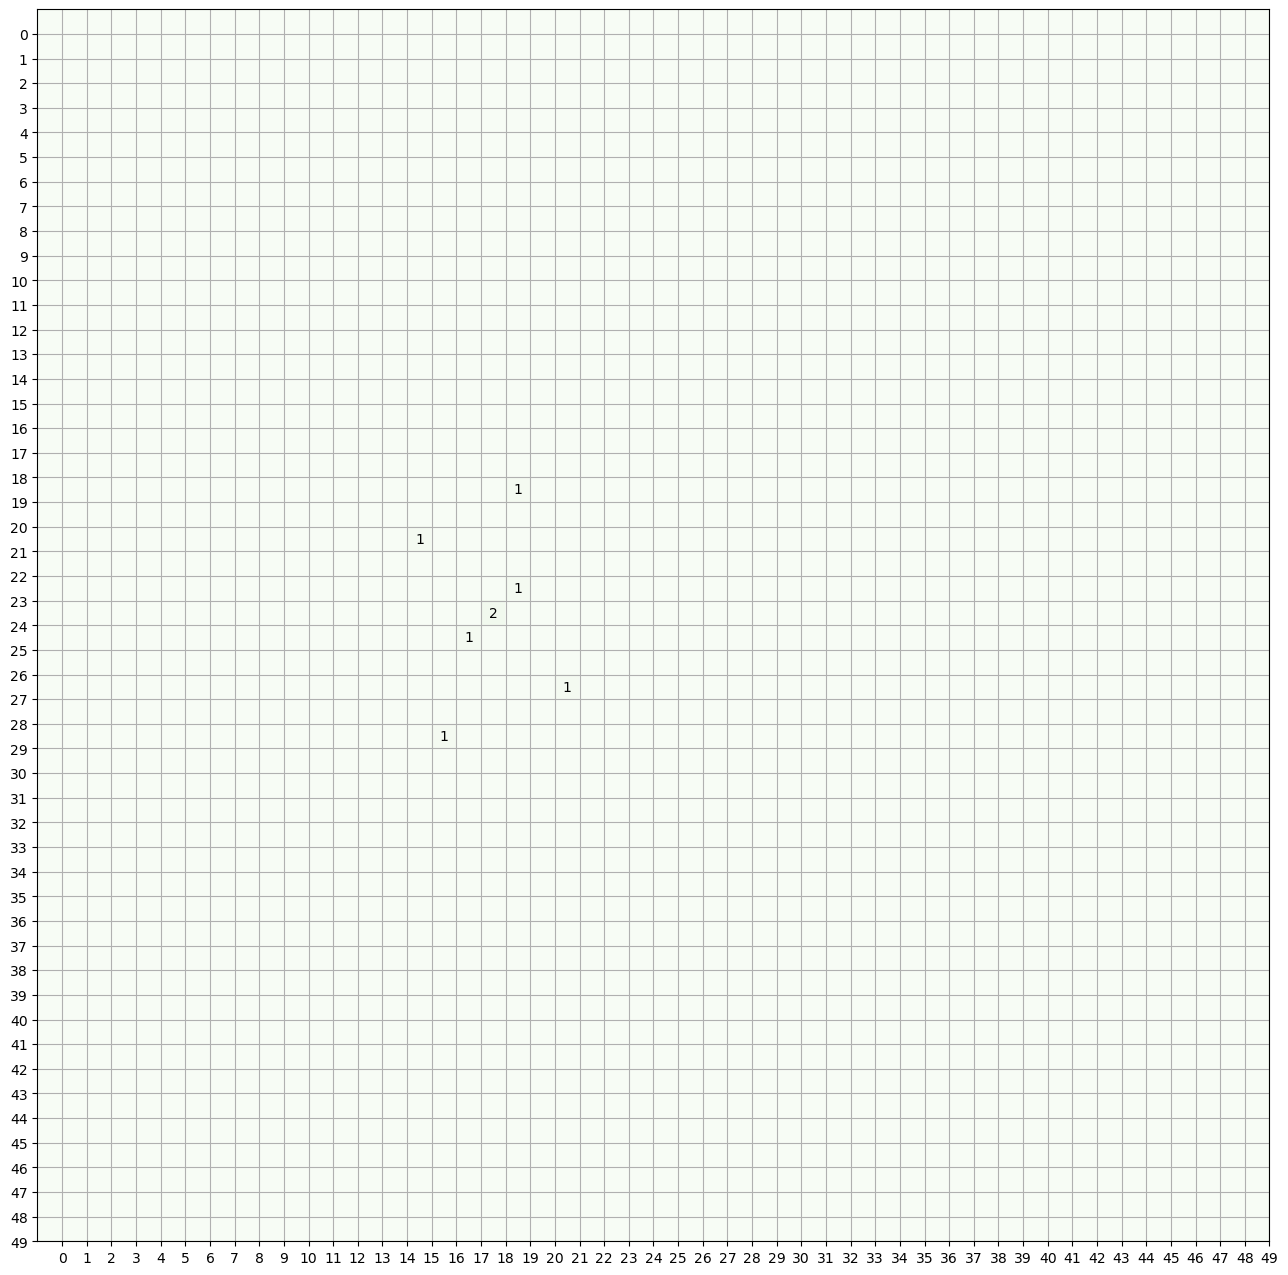

It has been 0.5011701583862305 seconds
Current number:  3


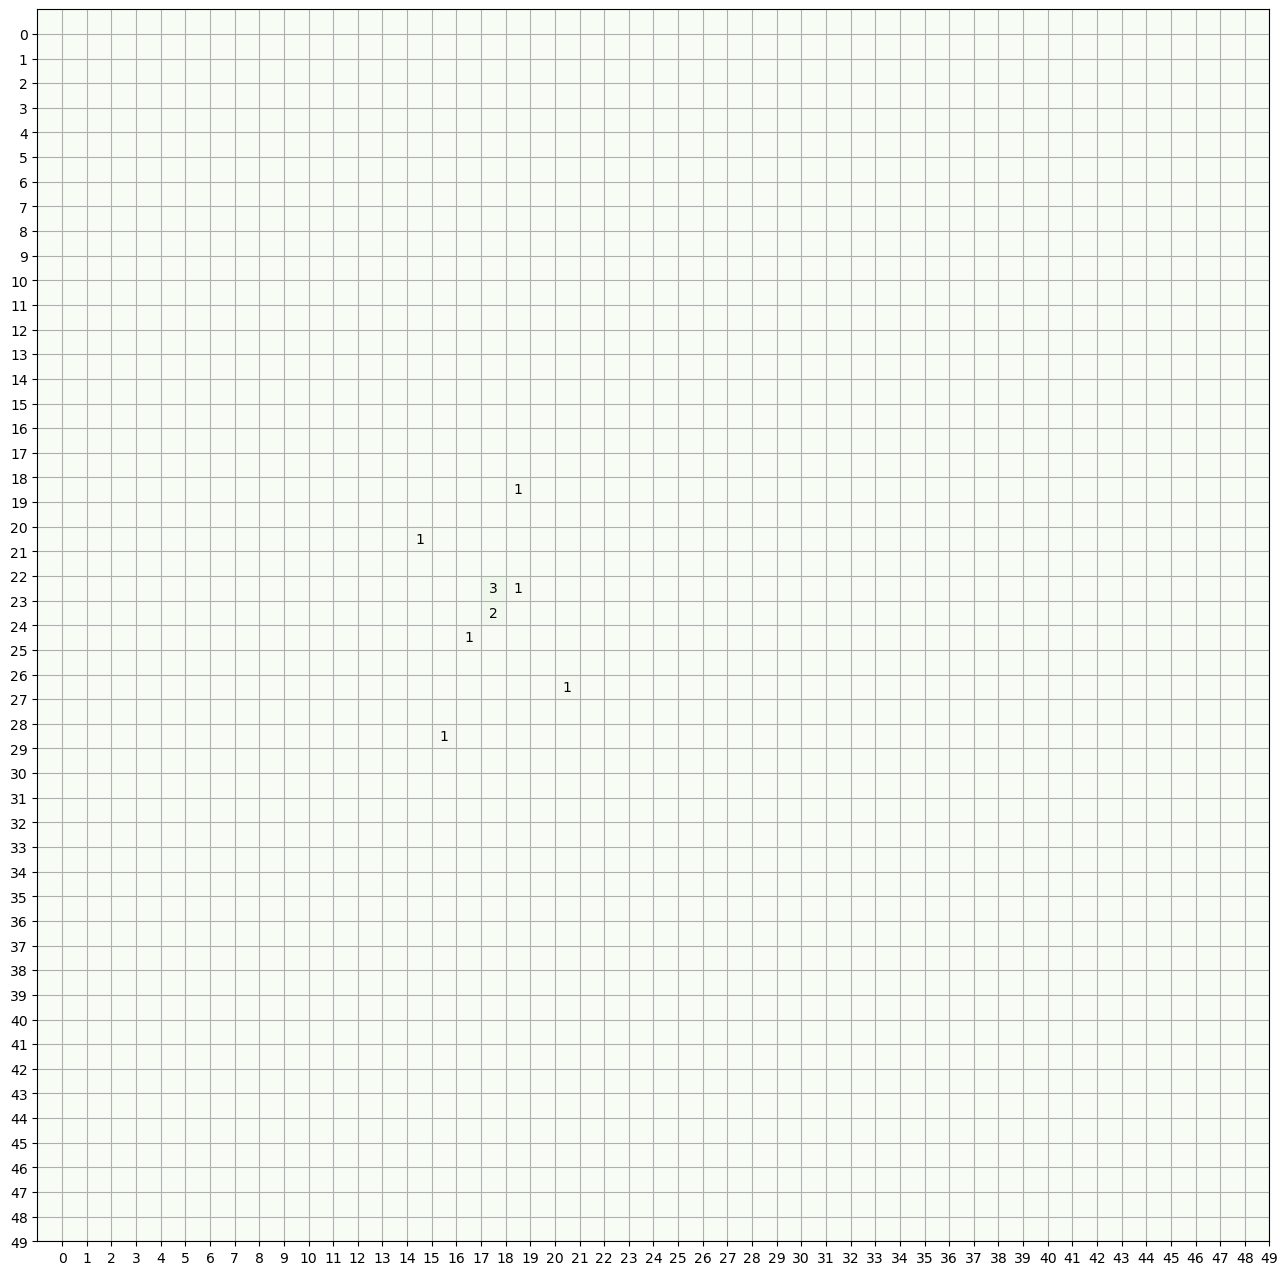

It has been 0.5280866622924805 seconds
Current number:  4


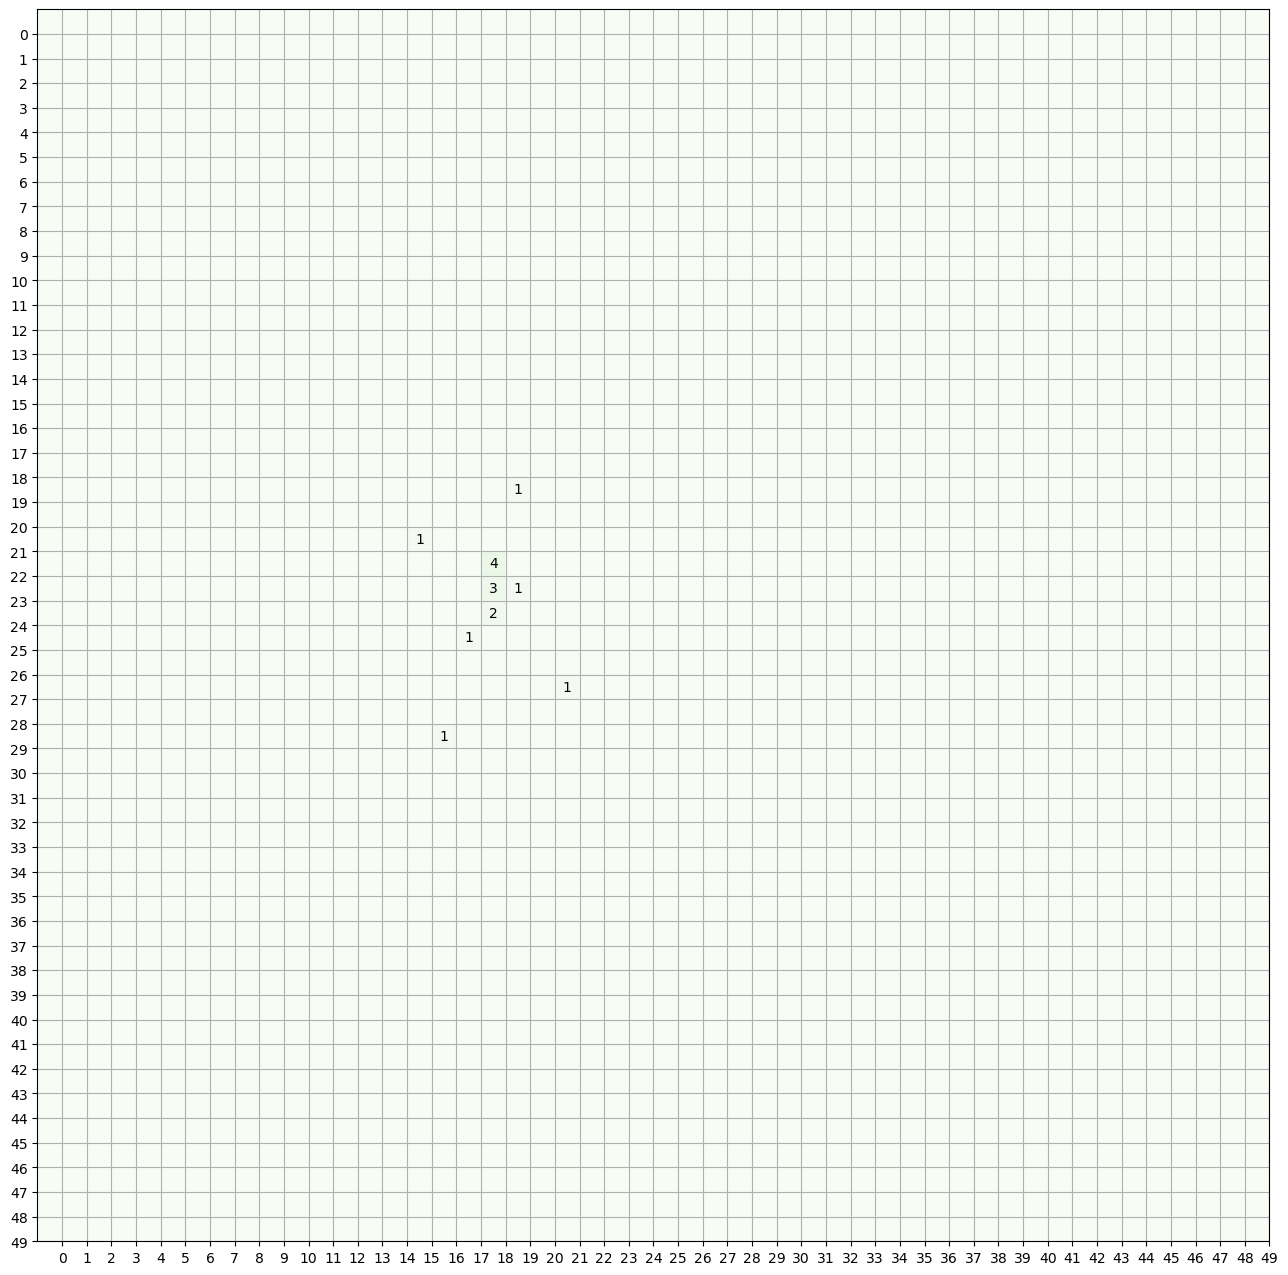

It has been 0.5474011898040771 seconds
Current number:  5


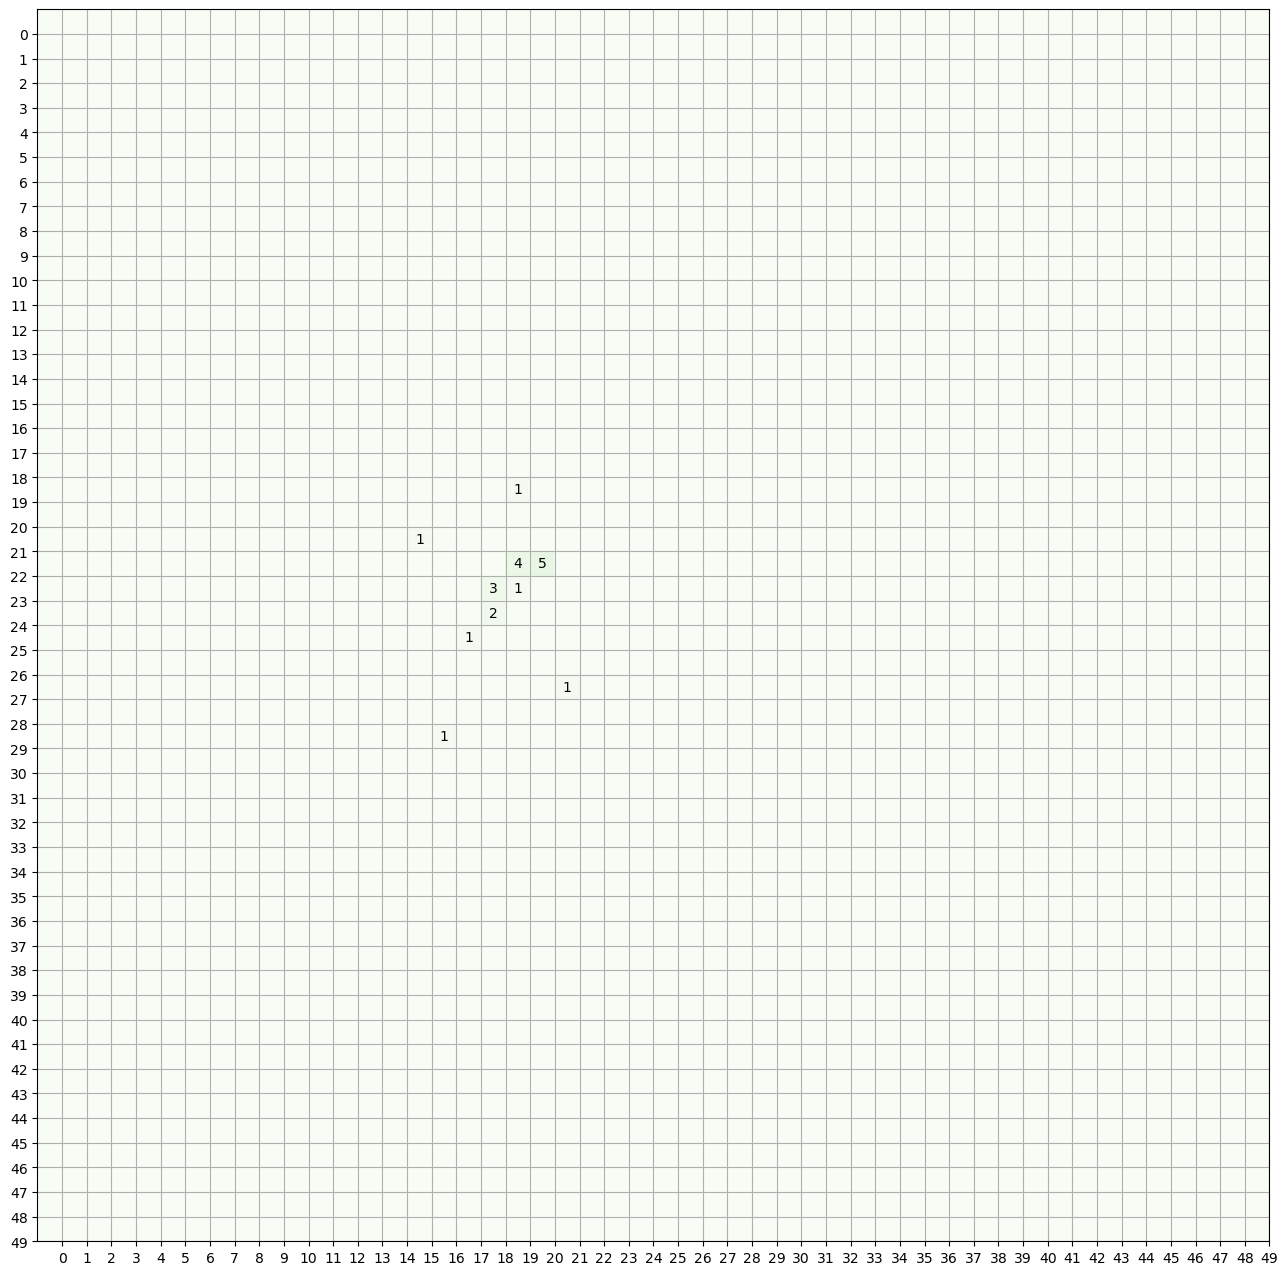

It has been 0.562293291091919 seconds
Current number:  6


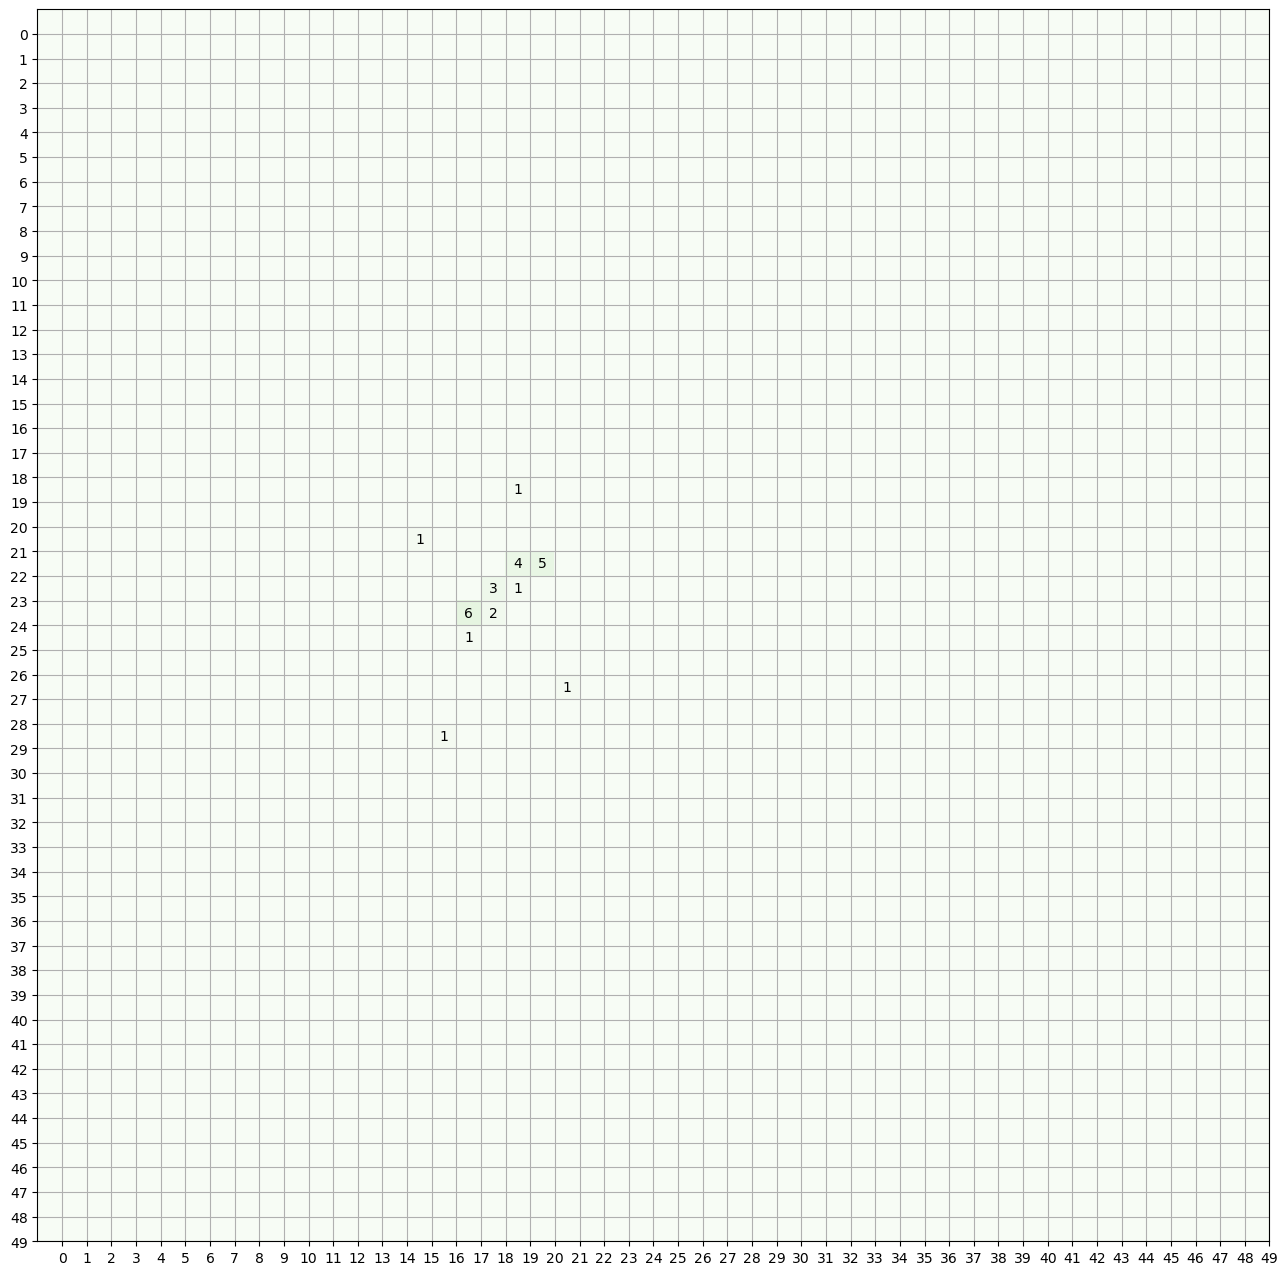

It has been 0.6035270690917969 seconds
Current number:  7


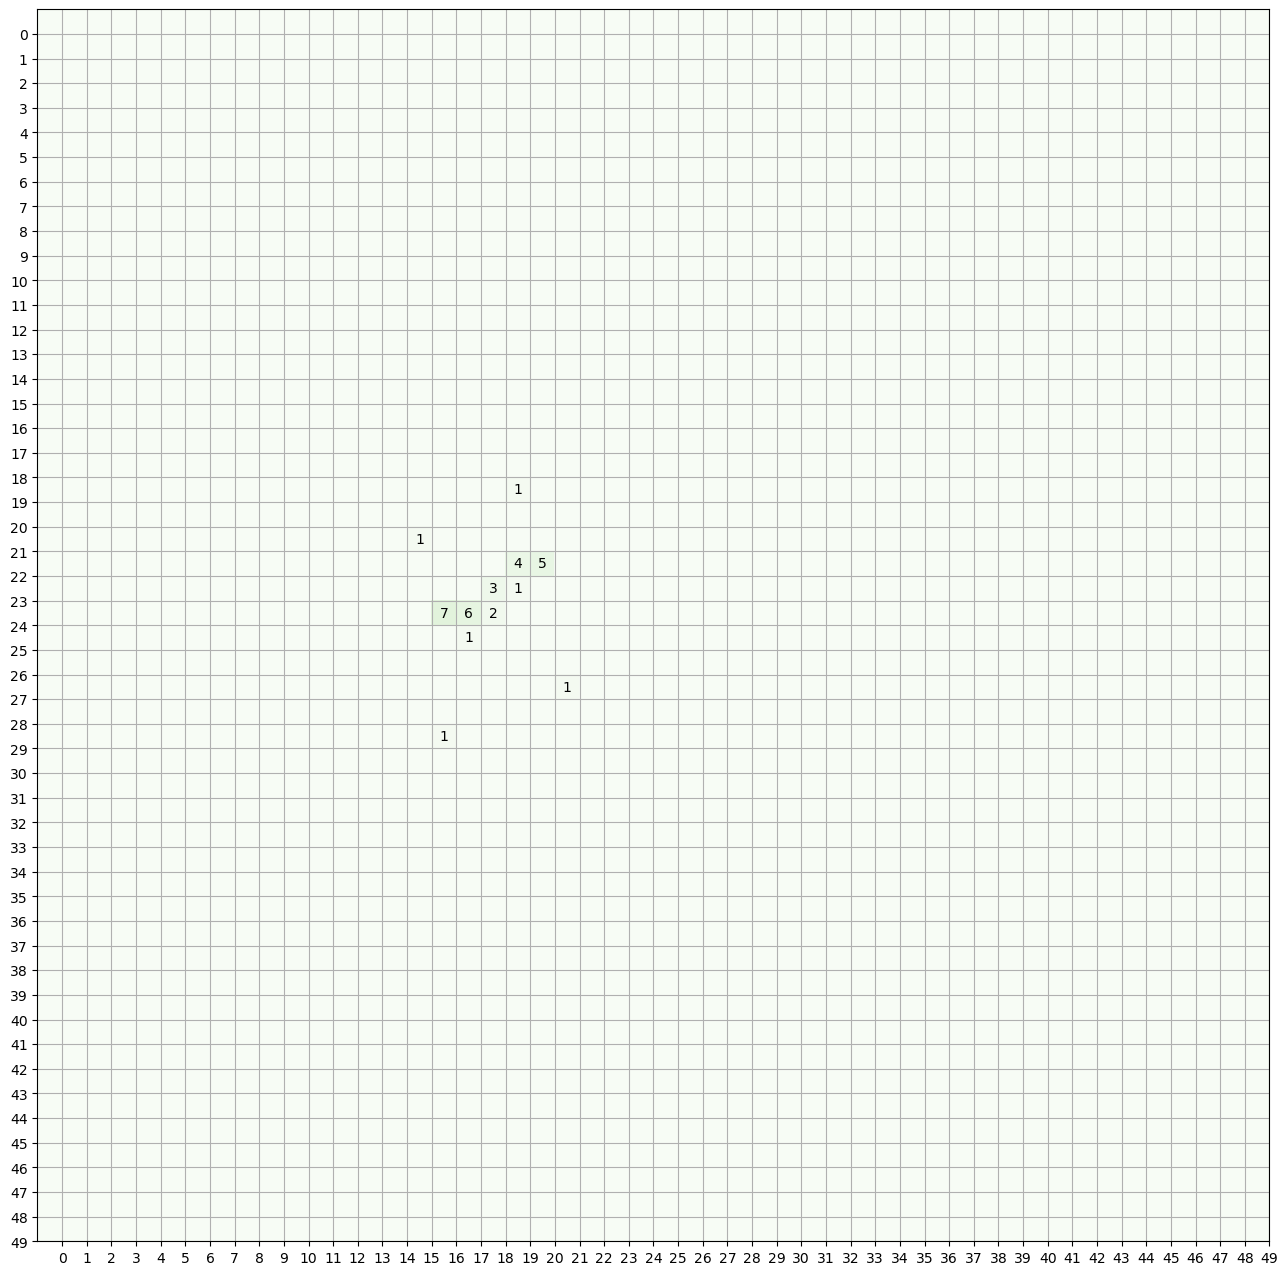

It has been 0.6929953098297119 seconds
Current number:  8


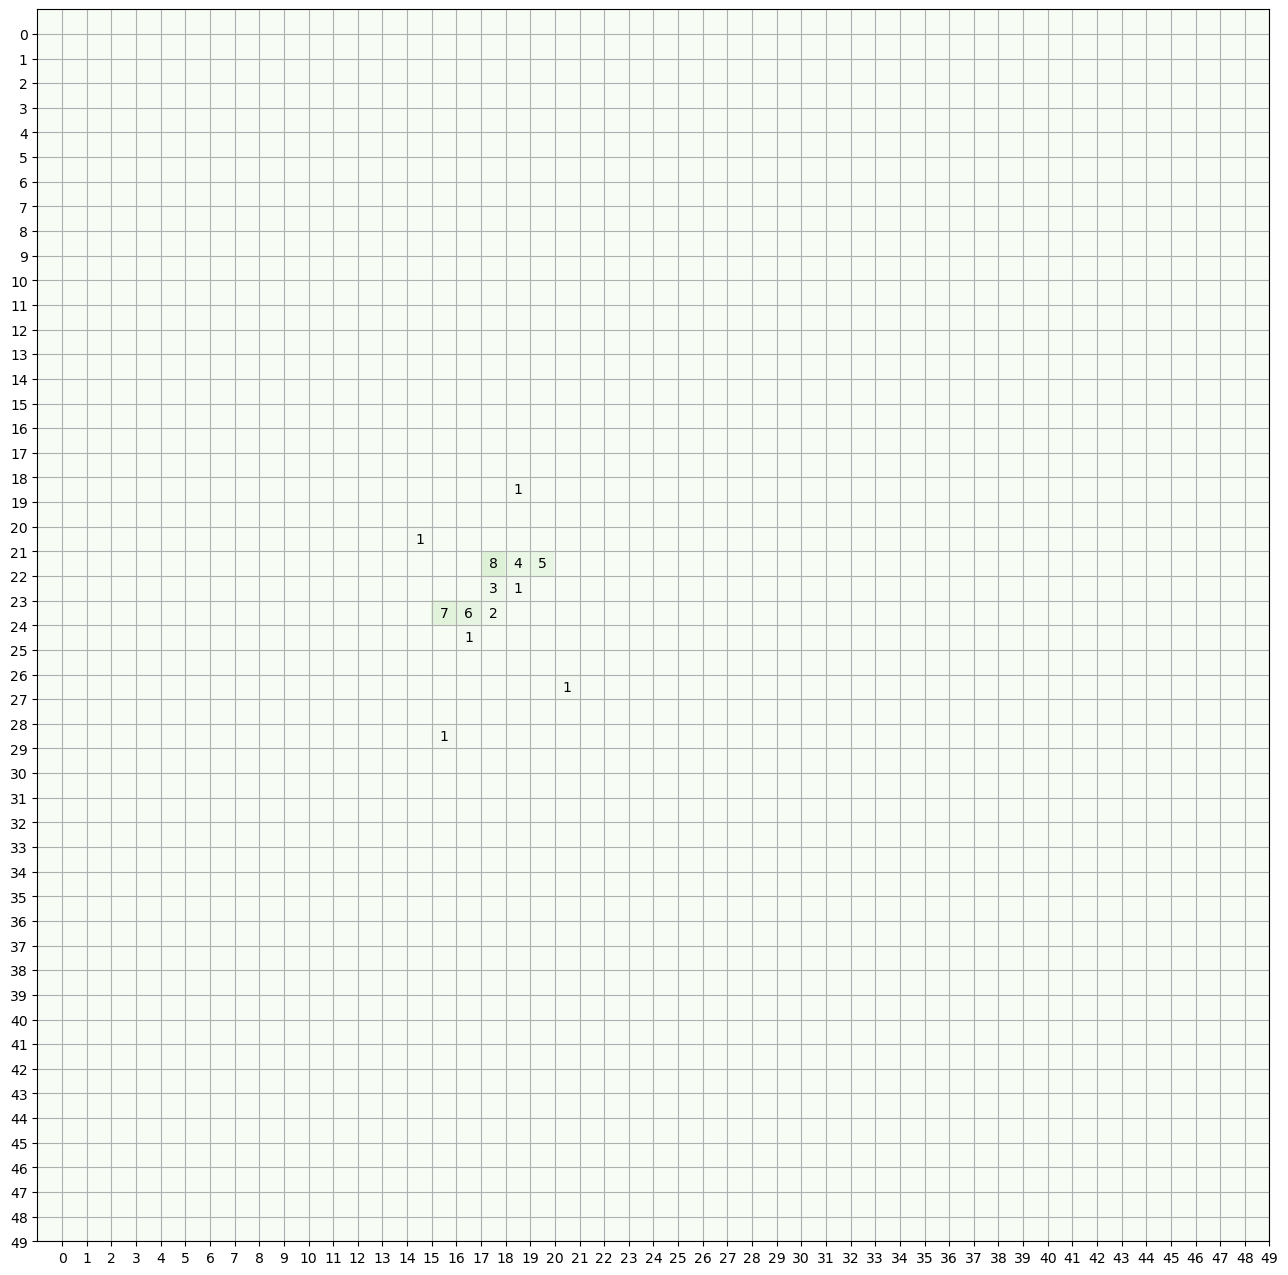

It has been 0.8904778957366943 seconds
Current number:  9


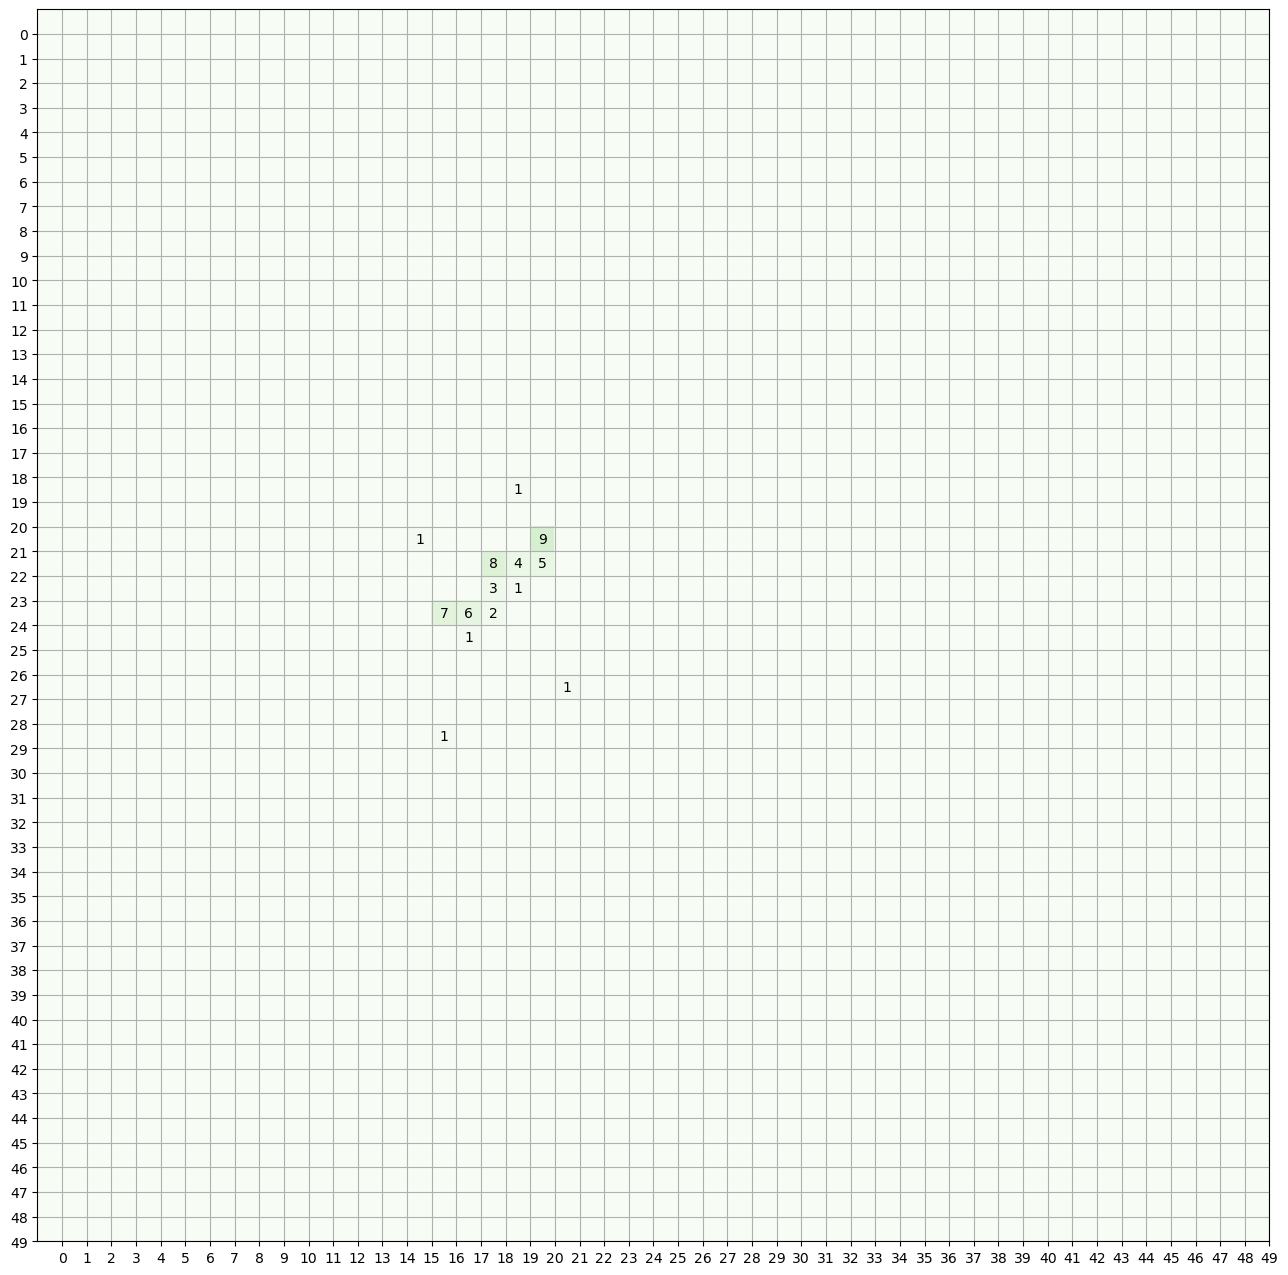

It has been 0.8325350284576416 seconds
Current number:  10


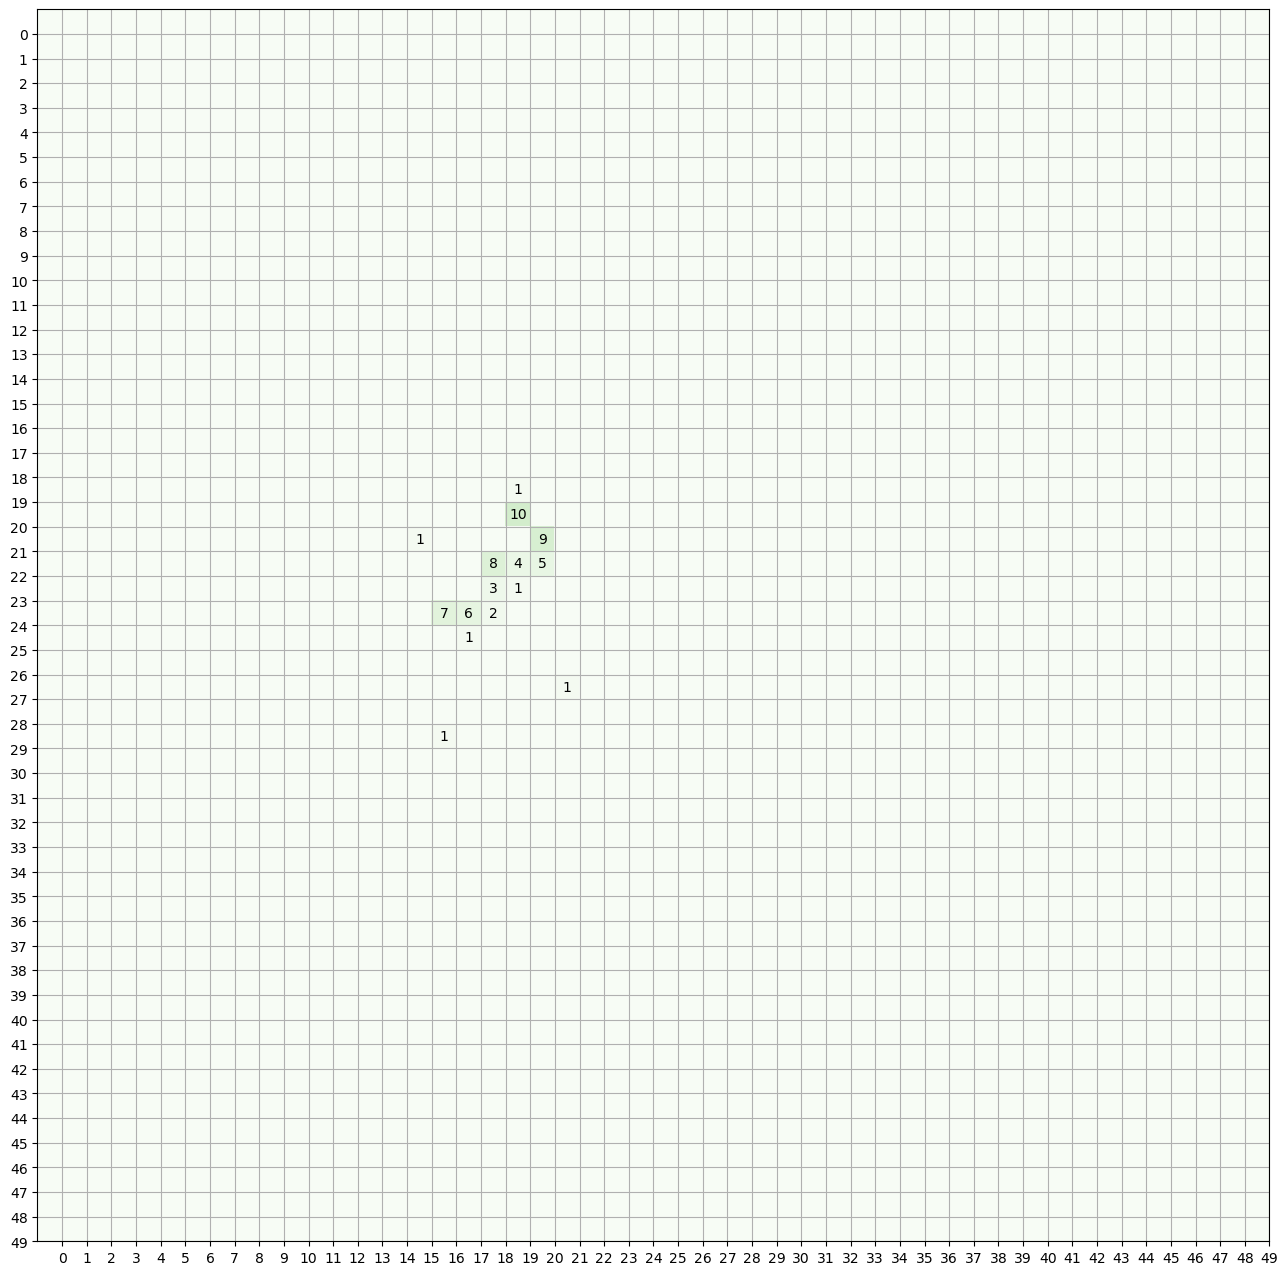

It has been 0.9719362258911133 seconds
Current number:  11


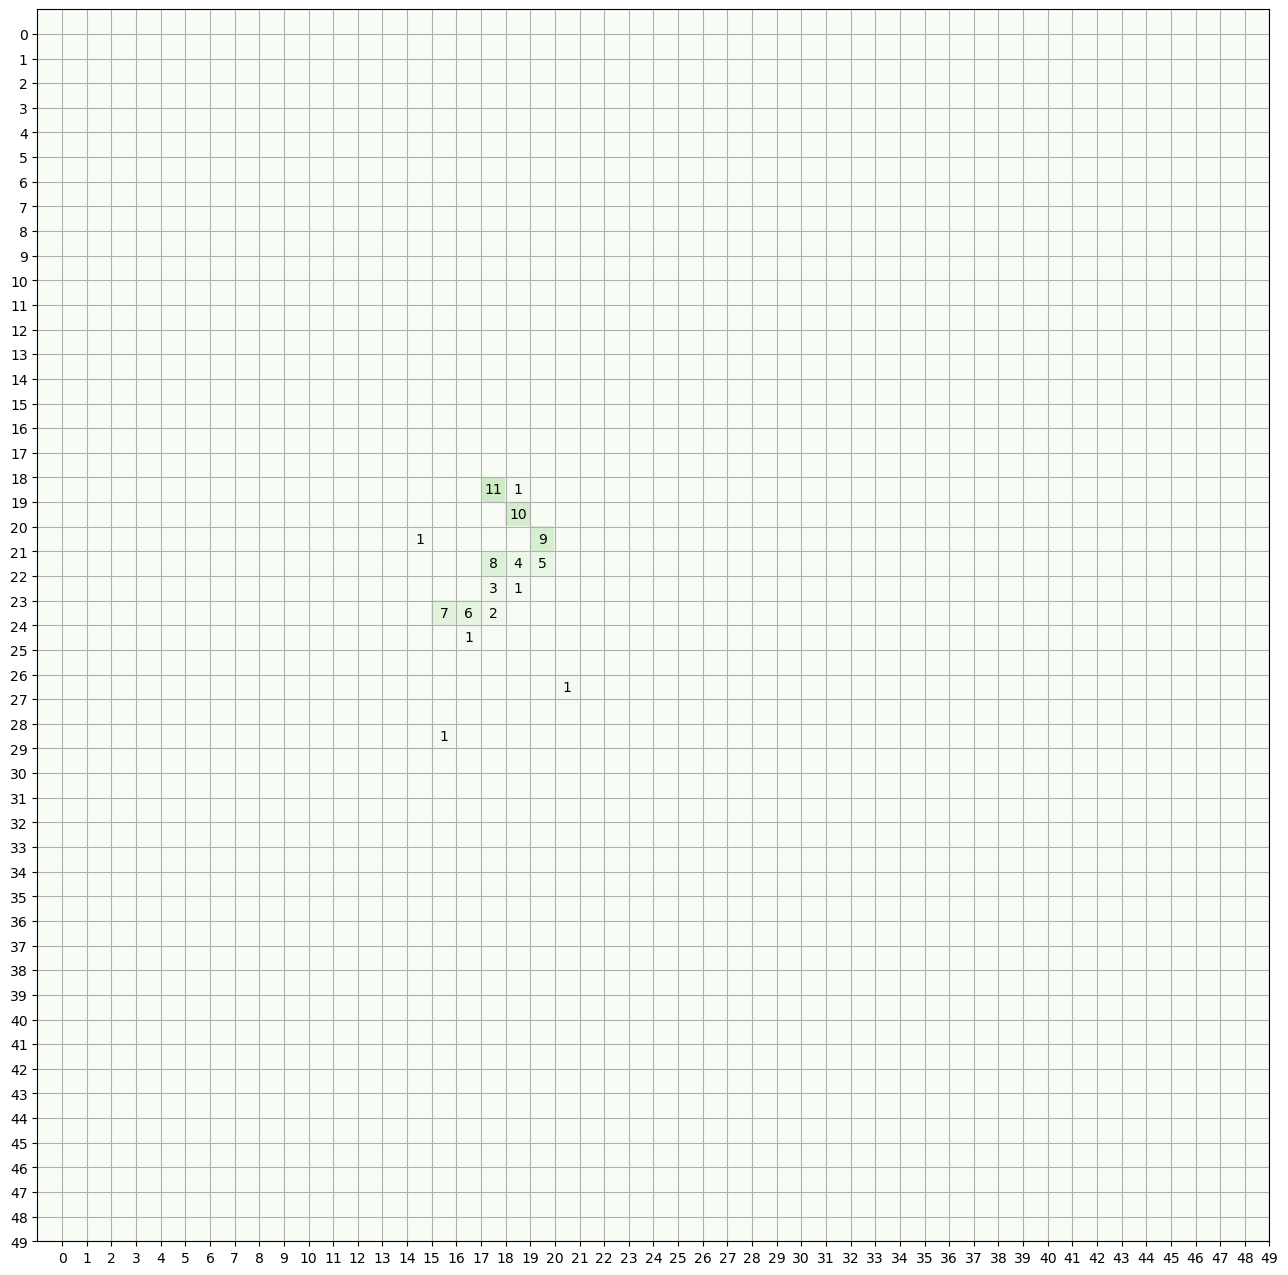

It has been 1.2933273315429688 seconds
Current number:  12


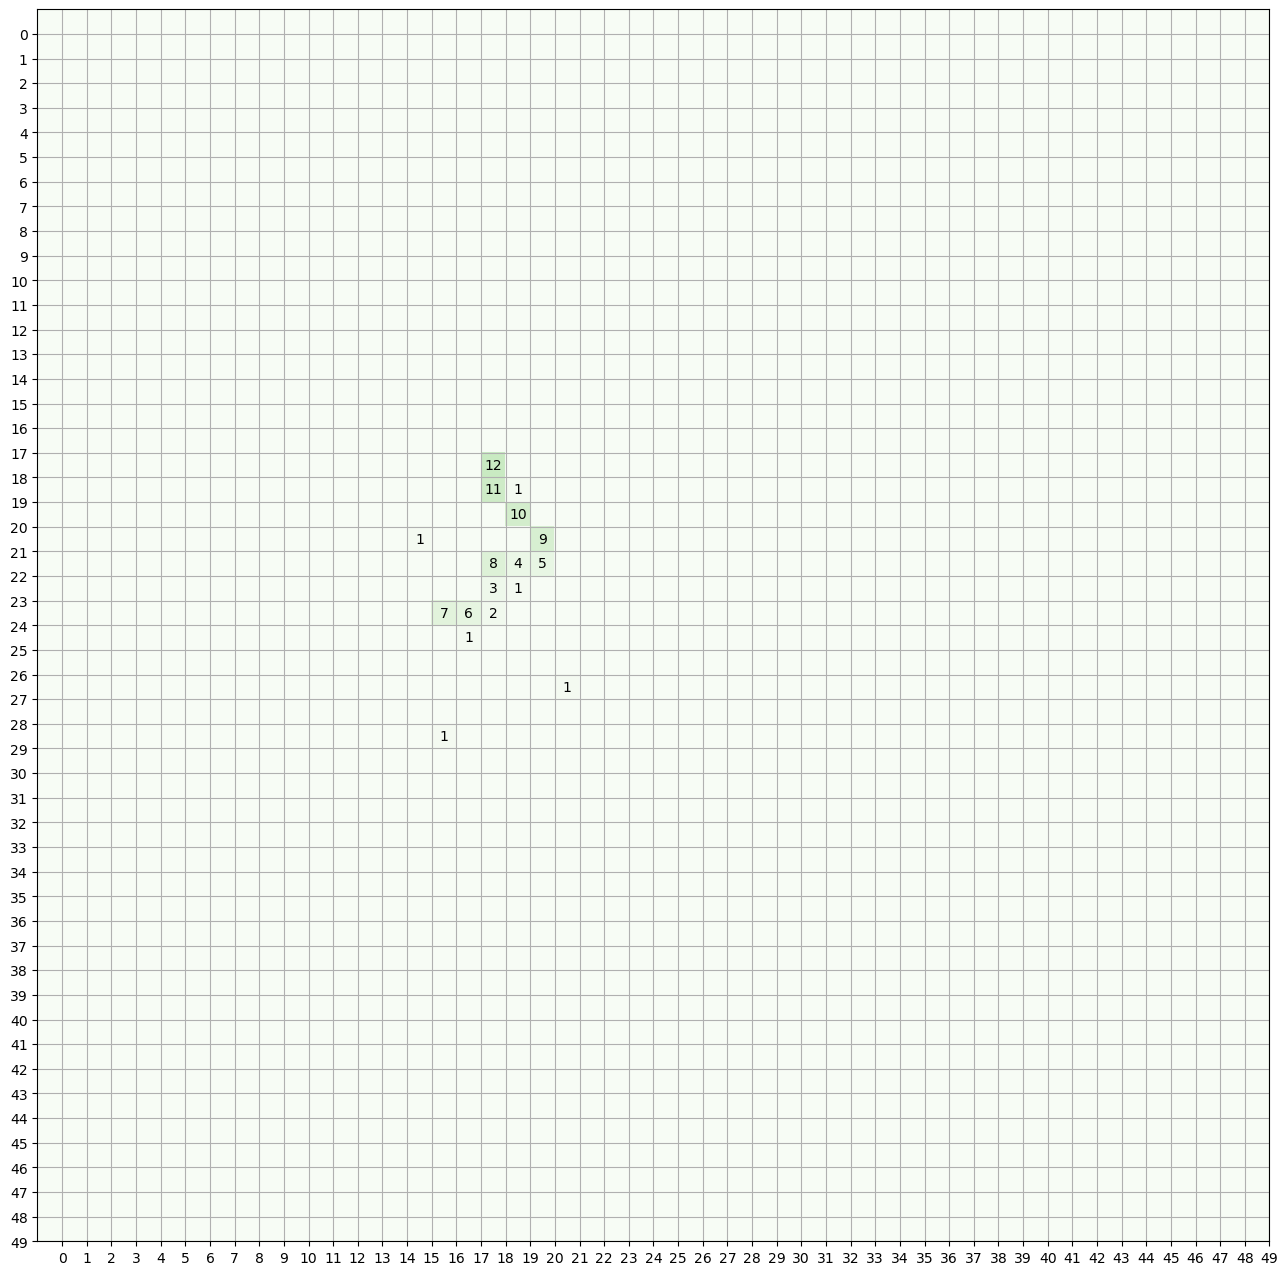

It has been 2.071065902709961 seconds
Current number:  13


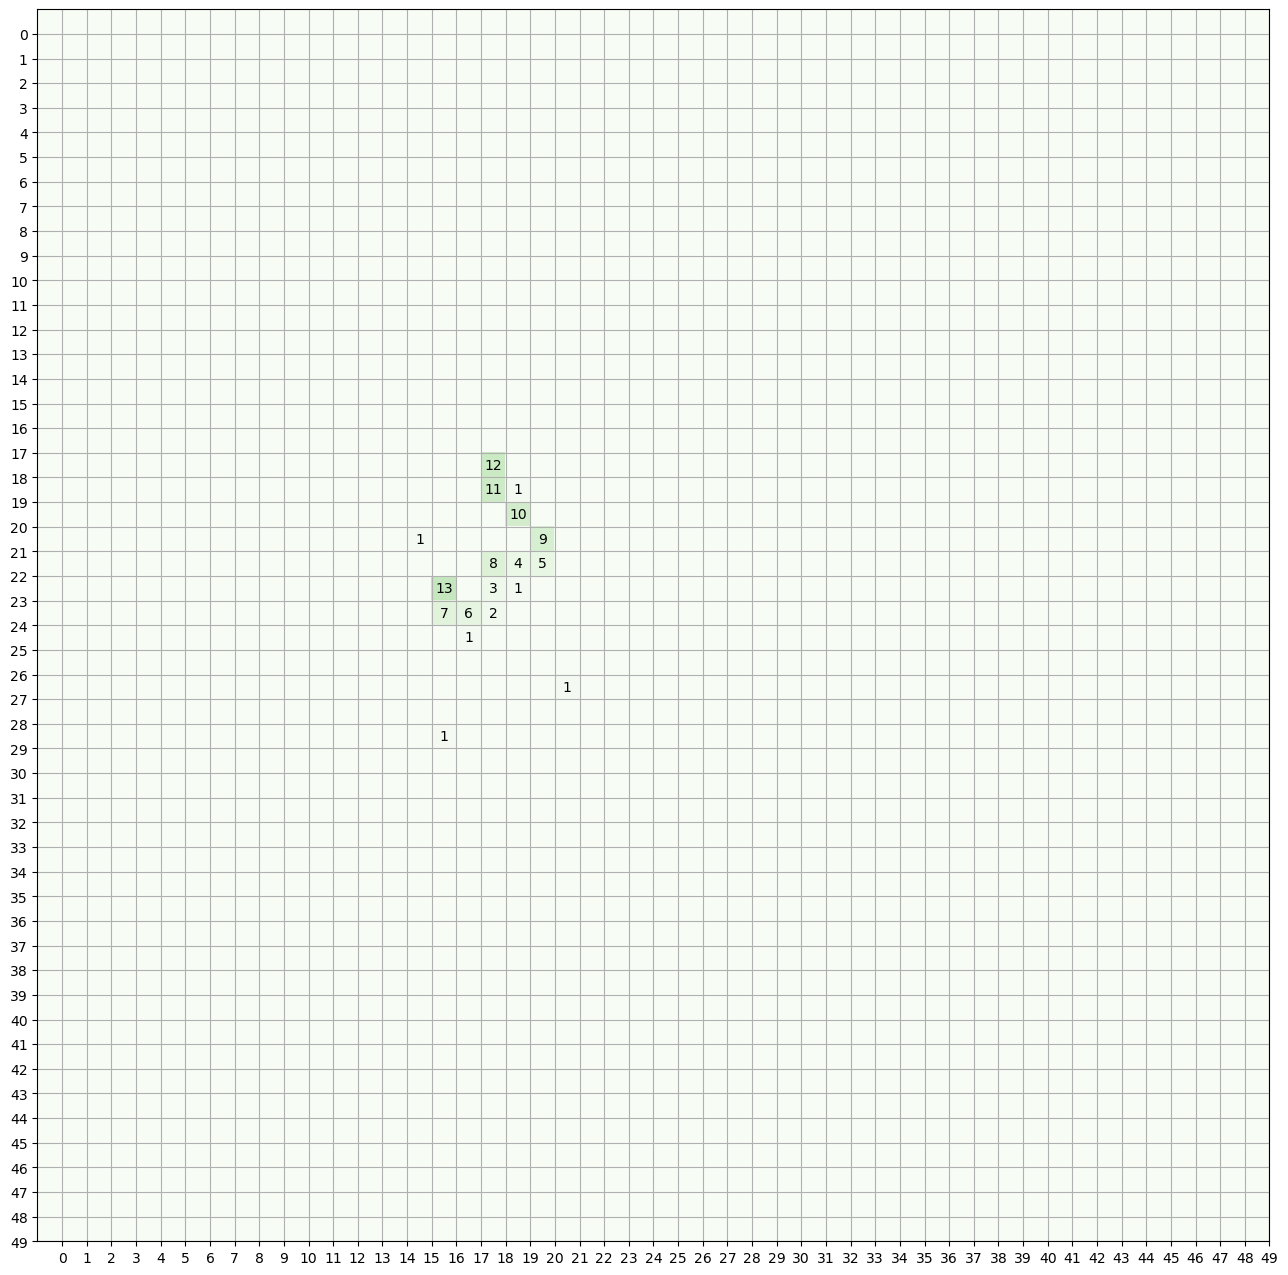

It has been 3.8369078636169434 seconds
Current number:  14


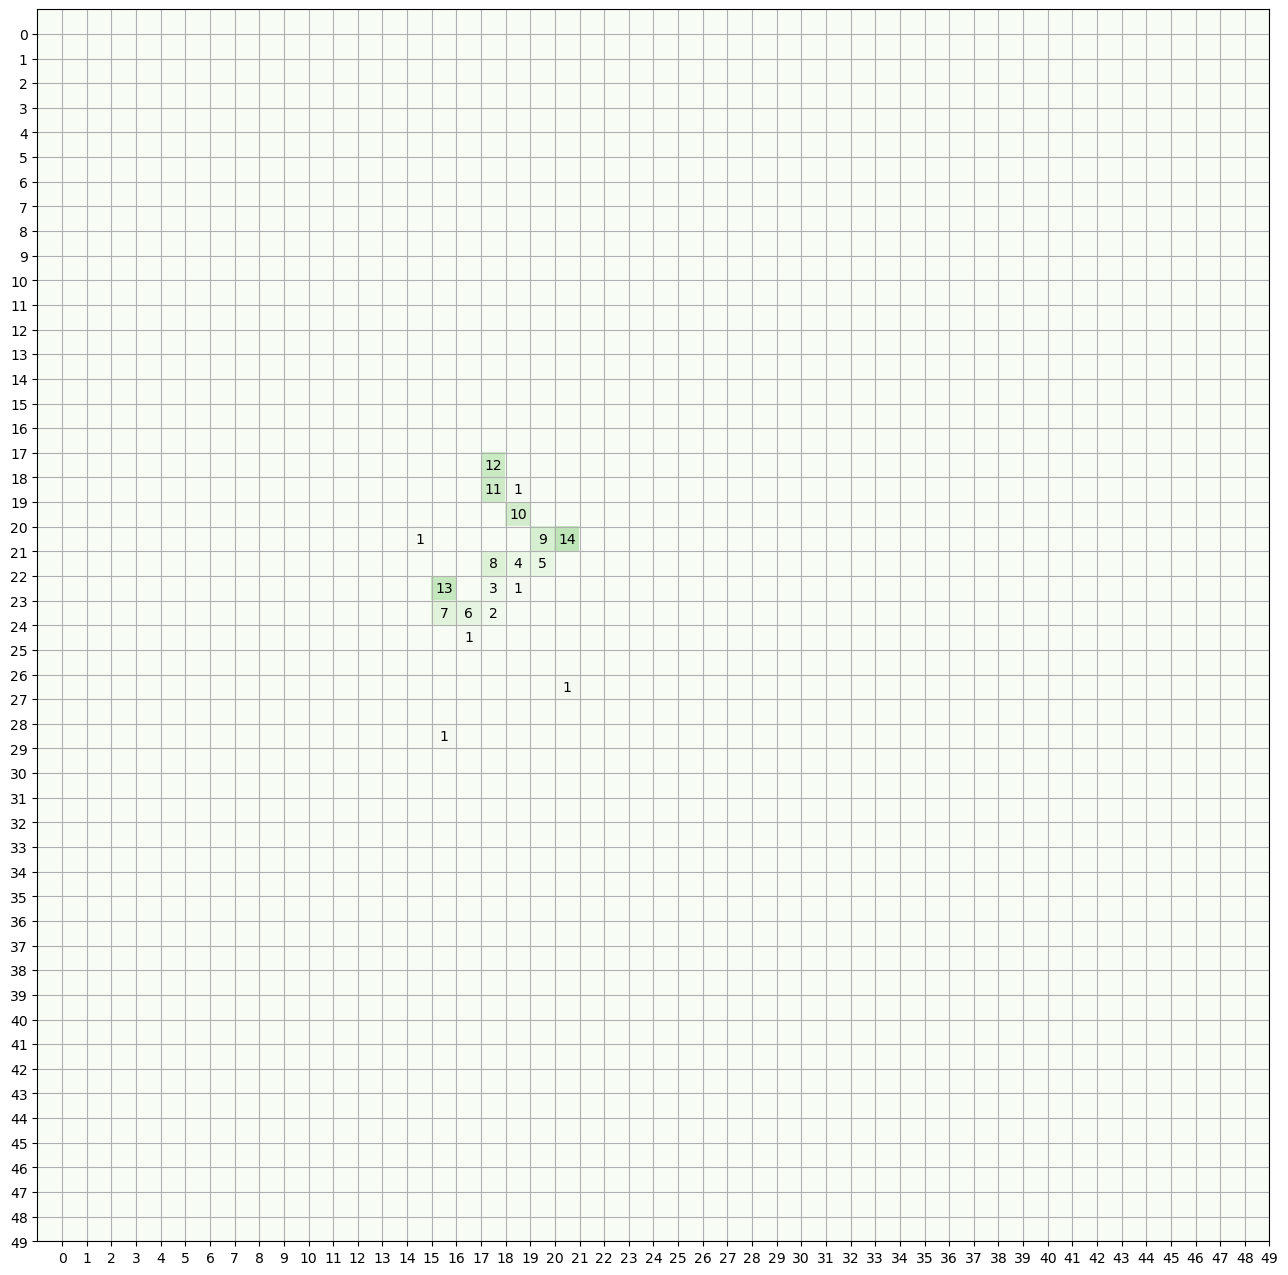

It has been 7.1476030349731445 seconds
Current number:  15


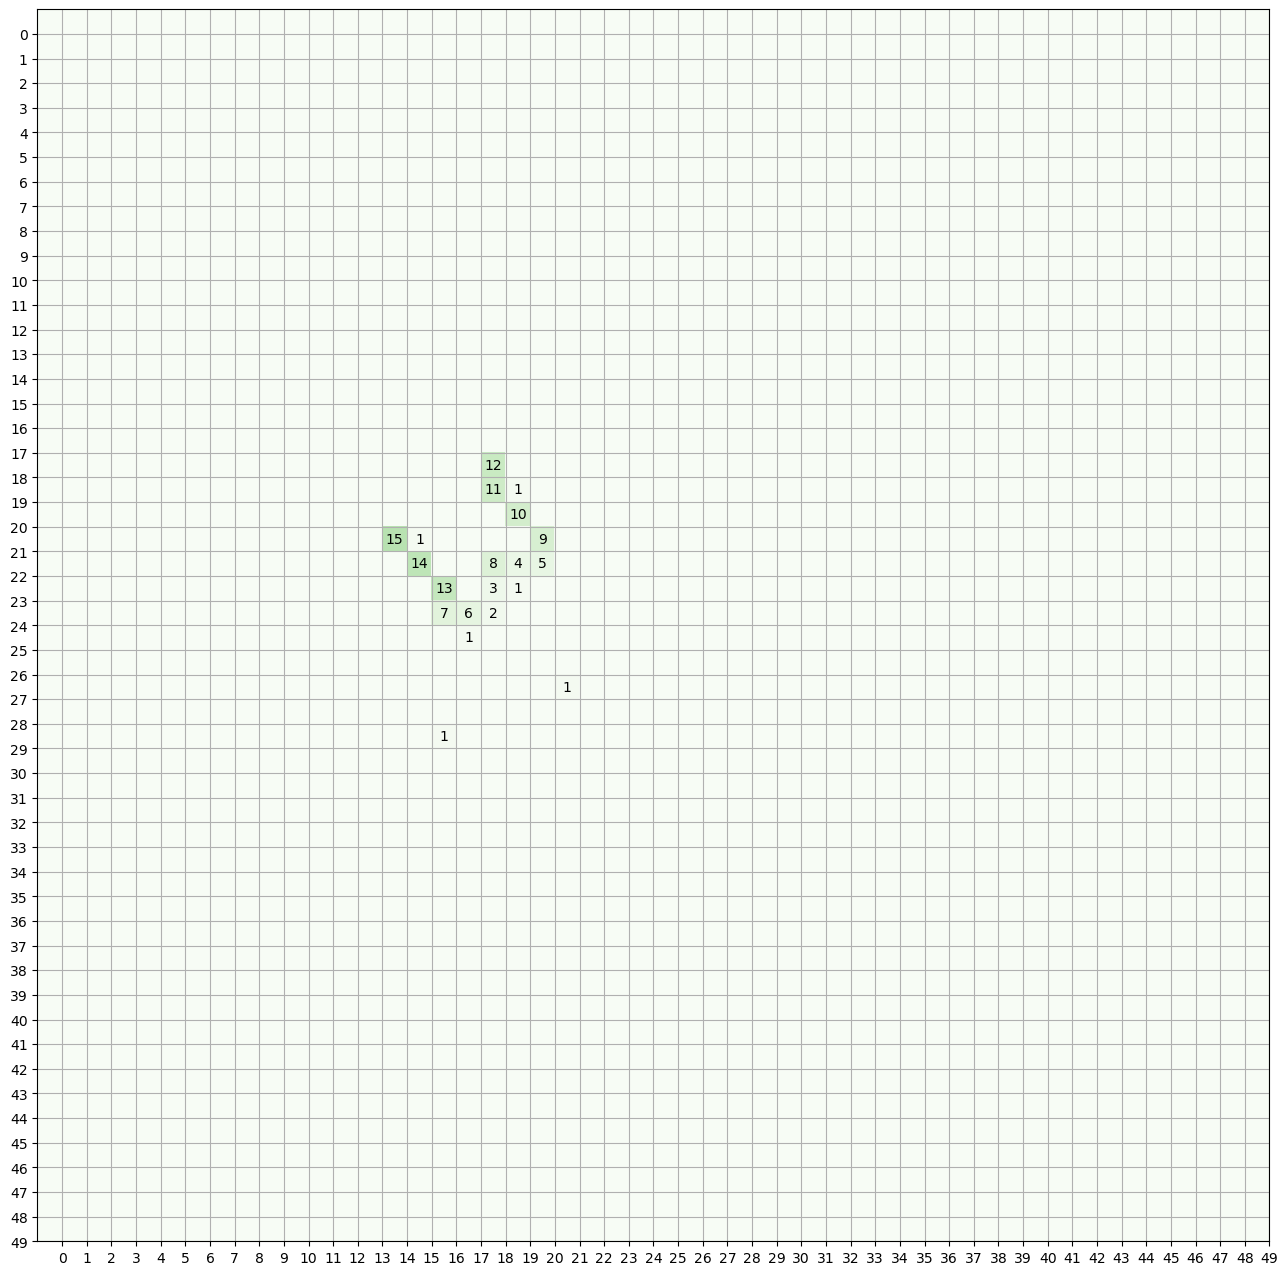

It has been 16.294323205947876 seconds
Current number:  16


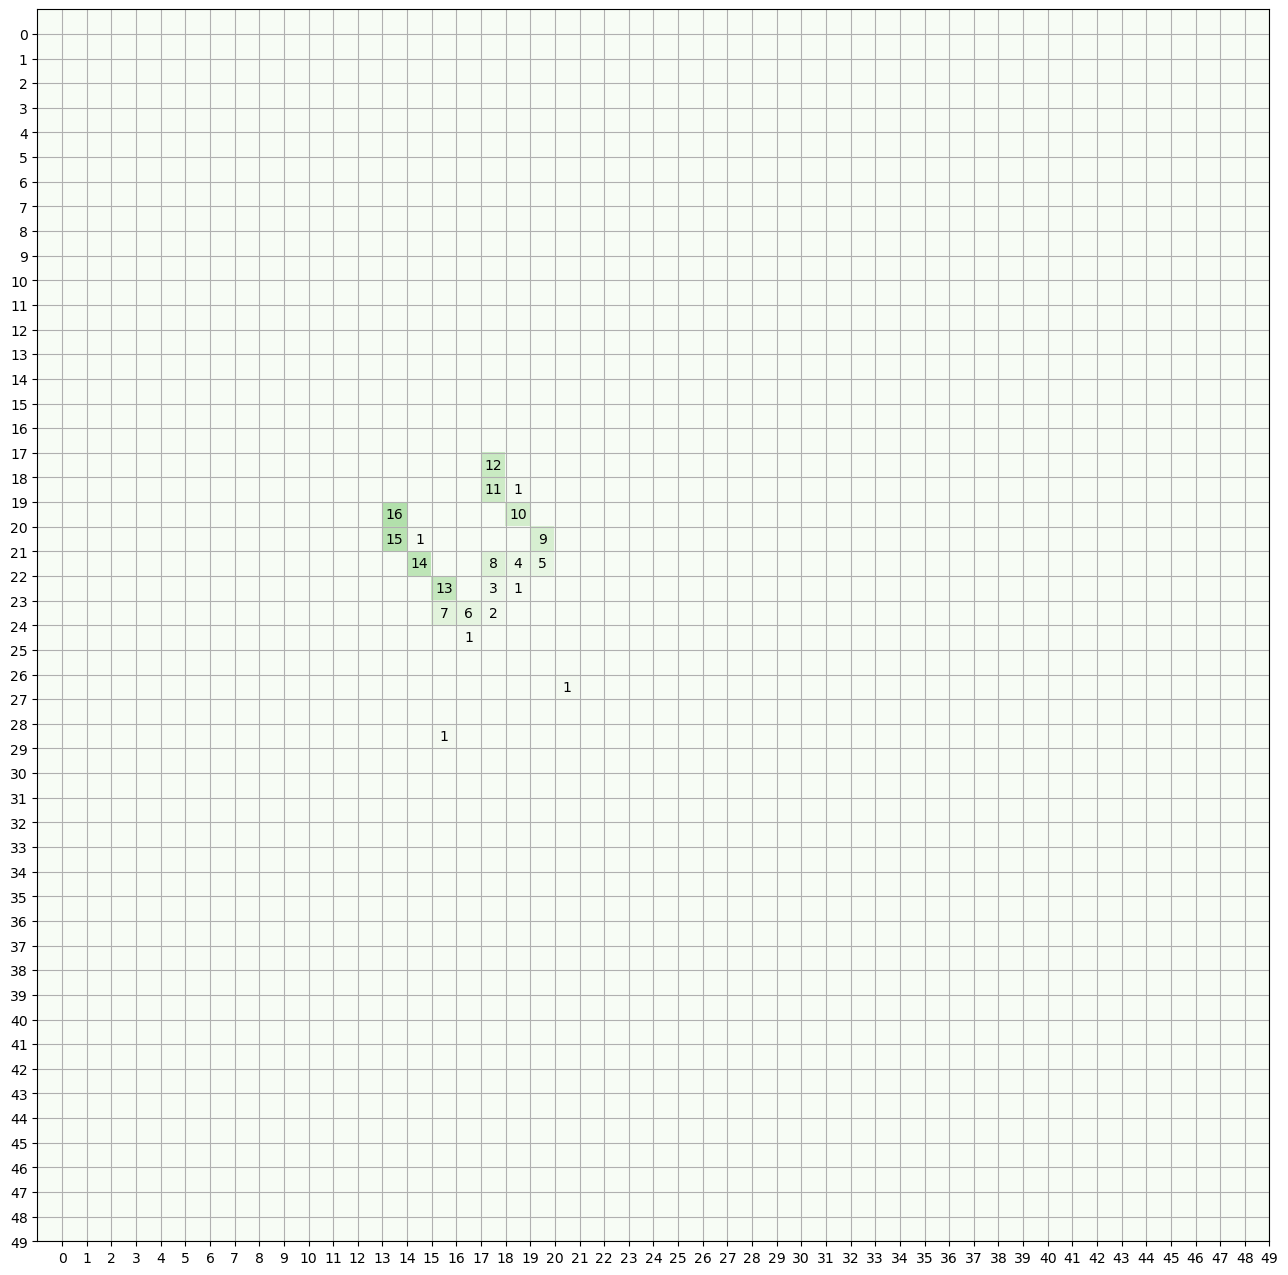

It has been 29.06448745727539 seconds
Current number:  17


KeyboardInterrupt: 

In [41]:
# find sospend_timens
candidates_list = [[(0,0,0)],]
dict_solutions = {}
n = 2
# starting_time = time.time()
spend_time = []
n_list = []
while len(candidates_list) > 0:
    starting_time = time.time()
    print("Current number: ", n)
    n_list.append(n)
    candidates_list_new = addAction(test0, candidates_list, n)
    plot_array(apply_candidate(test0, candidates_list_new[0]))
    #for candidate in candidates_list_new:
        #print('solutions for n = '+str(n)+': ', candidate)
    # move to next step
    candidates_list = candidates_list_new
    dict_solutions[n] = candidates_list_new
    n += 1
    now = time.time()
    print("It has been {0} seconds".format(now - starting_time))
    spend_time.append(now - starting_time)

# plot
print("largest number:", len(dict_solutions))
plot_array(apply_candidate(test0, dict_solutions[len(dict_solutions)][0]))

In [ ]:
# new_spend_time = []
# new_spend_time.append(spend_time[0][1])
# for index in range(1, len(spend_time)):
#     new_spend_time.append(spend_time[index][1] - spend_time[index-1][1])
# print(new_spend_time)

plt.plot(n_list, spend_time)

In [33]:
test0 = np.zeros((10,10), dtype=int)
test0[4,4] = 1
test0[2,5] = 1
test0[3,7] = 1
test0

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [34]:
def get_boundry(arr):
    # get left and right --> 4; 7
    for index, i in enumerate(arr.sum(axis=0)):
        if i != 0:
            left = index -1
            break
                            
    # get up and down --> 2; 4
    arr.sum(axis=1)
    return up, down, left, right

In [53]:
print((test0 !=0).argmax(axis=0) )
mask = test0 !=0
np.where(mask.any(axis=0), mask.argmax(axis=0), -1)

[0 0 0 0 4 2 0 3 0 0]


array([-1, -1, -1, -1,  4,  2, -1,  3, -1, -1])

In [54]:
print((test0 !=0).argmax(axis=1) )
mask = test0 !=0
np.where(mask.any(axis=1), mask.argmax(axis=1), -1)

[0 0 5 7 4 0 0 0 0 0]


array([-1, -1,  5,  7,  4, -1, -1, -1, -1, -1])

In [55]:
test0.sum(axis=0)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [37]:
# row index
# --> 4, 7
np.where(mask.any(axis=1), mask.argmax(axis=1), -1)

array([-1, -1,  5,  7,  4, -1, -1, -1, -1, -1])

In [43]:
test0[2,5]

1